In [1]:
import os
import sys
from pathlib import Path

curr_dir = Path(os.getcwd())

sys.path.append(str(curr_dir.parent.parent.absolute()))

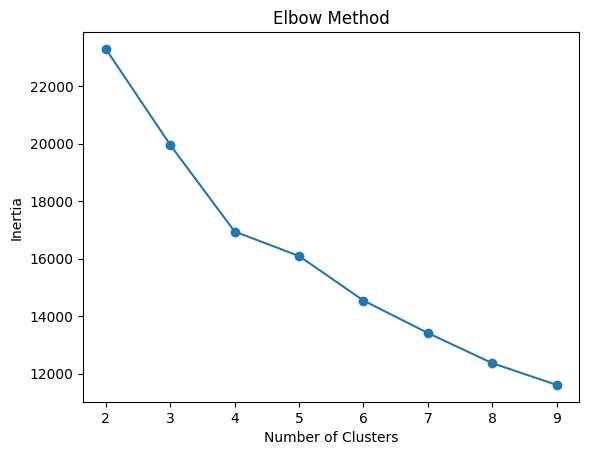

Silhouette Score: 0.7652402753125355


/tmp/ipykernel_2310/3057494313.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cluster"] = kmeans.fit_predict(scaled_df)


In [2]:
import sys
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

from stocks.resource import camel_to_snake, StocksDataAPI


df = StocksDataAPI().stock_info



# Select relevant features for clustering
features = list(
    map(
        camel_to_snake,
        [
            "marketCap",
            "enterpriseValue",
            "totalRevenue",
            "ebitda",
            "freeCashflow",
            "priceToBook",
            "priceToSalesTrailing12Months",
            "enterpriseToRevenue",
            "enterpriseToEbitda",
            "trailingPE",
            "profitMargins",
            "grossMargins",
            "ebitdaMargins",
            "operatingMargins",
            "earningsGrowth",
            "revenueGrowth",
            "earningsQuarterlyGrowth",
            "netIncomeToCommon",
            "trailingEps",
            "debtToEquity",
            "quickRatio",
            "currentRatio",
            "returnOnAssets",
            "returnOnEquity",
            "beta",
            "fiftyTwoWeekLow",
            "fiftyTwoWeekHigh",
            "fiftyDayAverage",
            "twoHundredDayAverage",
        ],
    )
)

# Filter out stocks with missing values in the selected features
df_filtered = df.dropna(subset=features)

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_filtered[features])

# Convert scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)


# Plot the elbow curve
plt.plot(range(2, 10), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Based on the elbow method, choose an optimal number of clusters
optimal_clusters = 7  # choice based on elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_filtered["Cluster"] = kmeans.fit_predict(scaled_df)

# Calculate silhouette score to evaluate clustering quality
sil_score = silhouette_score(scaled_df, df_filtered["Cluster"])
print(f"Silhouette Score: {sil_score}")

In [3]:
df_filtered

,Unnamed: 0,symbol,name_of_company,series,date_of_listing,isin_number,industry_key,sector_key,macro,basic_industry,...,gross_margins,ebitda_margins,operating_margins,return_on_assets,return_on_equity,long_business_summary,beta,recommendation_key,market_cap_rank,Cluster
1,1,JPOLYINVST,Jindal Poly Investment and Finance Company Lim...,EQ,11-NOV-2013,INE147P01019,asset-management,financial-services,Financial Services,Investment Company,...,1.00000,0.98901,0.99109,0.00868,0.11801,Jindal Poly Investment and Finance Company Lim...,-0.032,none,1272.0,4
3,3,GOKEX,Gokaldas Exports Limited,EQ,27-APR-2005,INE887G01027,apparel-manufacturing,consumer-cyclical,Consumer Discretionary,Garments & Apparels,...,0.51938,0.10618,0.06865,0.05015,0.12029,"Gokaldas Exports Limited designs, manufactures...",0.470,strong_buy,622.0,0
6,6,PENINLAND,Peninsula Land Limited,EQ,08-FEB-1995,INE138A01028,real-estate-development,real-estate,Consumer Discretionary,Residential Commercial Projects,...,0.35419,0.22385,0.26148,0.06754,1.03351,Peninsula Land Limited engages in the real est...,0.893,none,1011.0,0
8,8,ONGC,Oil & Natural Gas Corporation Limited,EQ,19-JUL-1995,INE213A01029,oil-gas-integrated,energy,Energy,Oil Exploration & Production,...,0.37893,0.16594,0.09212,0.06989,0.17139,Oil and Natural Gas Corporation Limited explor...,0.739,buy,13.0,3
10,10,ZIMLAB,Zim Laboratories Limited,EQ,25-NOV-2022,INE518E01015,drug-manufacturers-specialty-generic,healthcare,Healthcare,Pharmaceuticals,...,0.50603,0.10628,0.10194,0.04069,0.07855,ZIM Laboratories Limited engages in the develo...,0.574,none,1410.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,1932,PRECWIRE,Precision Wires India Limited,EQ,06-SEP-1995,INE372C01037,other_industry,other_sector,Industrials,Aluminium Copper & Zinc Products,...,0.07739,0.04059,0.03714,0.07325,0.15229,Precision Wires India Limited manufactures and...,1.125,buy,883.0,0
1971,1971,HISARMETAL,Hisar Metal Industries Limited,EQ,05-JAN-2017,INE598C01011,other_industry,other_sector,Industrials,Iron & Steel Products,...,0.23199,0.06650,0.04163,0.05473,0.11309,Hisar Metal Industries Limited manufactures an...,1.038,none,1782.0,0
1972,1972,MSPL,MSP Steel & Power Limited,EQ,18-JUL-2005,INE752G01015,other_industry,other_sector,Industrials,Iron & Steel Products,...,0.20142,0.04362,0.01525,0.02661,0.02489,"MSP Steel & Power Limited, together with its s...",1.121,none,1220.0,0
1973,1973,HCLTECH,HCL Technologies Limited,EQ,06-JAN-2000,INE860A01027,other_industry,other_sector,Information Technology,Computers - Software & Consulting,...,0.35611,0.20746,0.17093,0.13488,0.24667,HCL Technologies Limited offers software devel...,0.618,hold,11.0,1


In [4]:
df_filtered.groupby("Cluster").size()

Cluster
0    887
1      2
2      1
3     12
4      1
5      2
6      2
dtype: int64

In [5]:
# Analyze the characteristics of each cluster
cluster_summary = df_filtered.groupby("Cluster").describe().transpose()
cluster_summary

Cluster                          0            1      2           3       4  \
Unnamed: 0      count   887.000000     2.000000    1.0   12.000000     1.0   
                mean    961.307779  1566.500000  136.0  982.500000     1.0   
                std     559.548878   574.877813    NaN  608.392293     NaN   
                min       3.000000  1160.000000  136.0    8.000000     1.0   
                25%     467.500000  1363.250000  136.0  554.000000     1.0   
...                            ...          ...    ...         ...     ...   
market_cap_rank min      14.000000     5.000000  160.0    2.000000  1272.0   
                25%     432.500000     6.500000  160.0   12.000000  1272.0   
                50%     858.000000     8.000000  160.0   16.500000  1272.0   
                75%    1307.500000     9.500000  160.0   27.250000  1272.0   
                max    1922.000000    11.000000  160.0  121.000000  1272.0   

Cluster                          5            6  
Unnamed: 0      count     2.000000     2.000000  
                mean    787.500000   351.500000  
                std     754.482936   275.064538  
                min     254.000000   157.000000  
                25%     520.750000   254.250000  
...                            ...          ...  
market_cap_rank min     241.000000   882.000000  
                25%     478.500000   985.500000  
                50%     716.000000  1089.000000  
                75%     953.500000  1192.500000  
                max    1191.000000  1296.000000  

[544 rows x 7 columns]

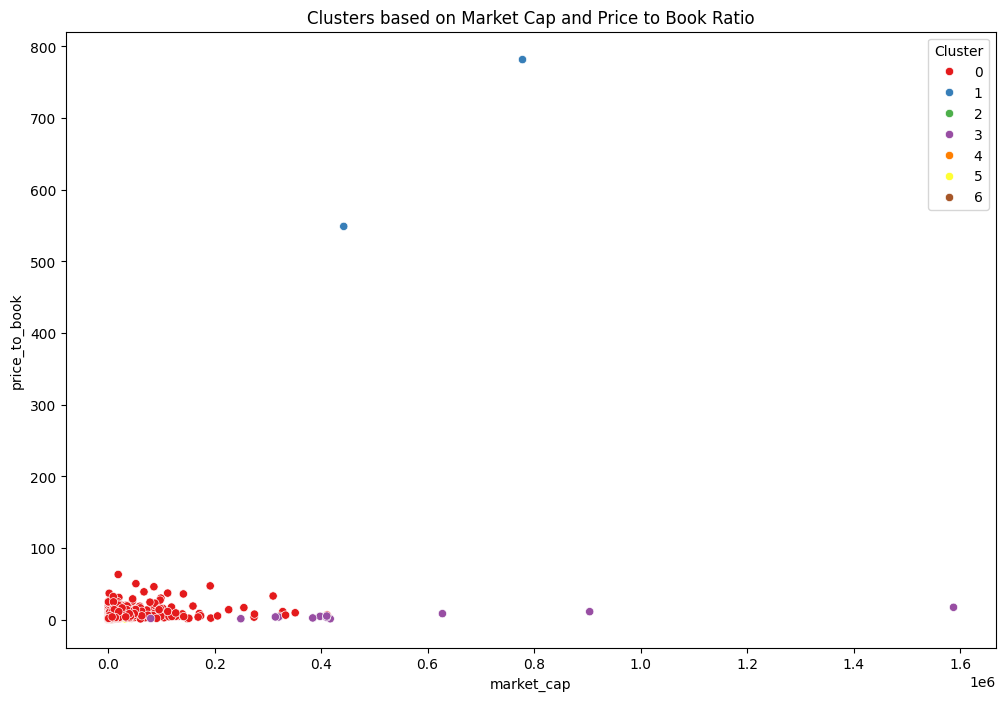

In [6]:
# Example visualization of clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="market_cap", y="price_to_book", hue="Cluster", data=df_filtered, palette="Set1"
)
plt.title("Clusters based on Market Cap and Price to Book Ratio")
plt.show()